# **Import Library**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
df = pd.read_csv('/content/jokowi.csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1826983134279385184,Fri Aug 23 23:57:03 +0000 2024,0,@1998ur_ aku juga abis nge cut off cowo yg aku...,1827132978625171785,https://pbs.twimg.com/media/GVtHwoqa8AIV6Js.jpg,1998ur_,in,dirumah,0,0,0,https://x.com/sh3fiaaaa_/status/18271329786251...,1503009338616868868,sh3fiaaaa_
1,1826368659779973545,Fri Aug 23 23:57:03 +0000 2024,0,@CAMERALIVE6849 DPR DPR yg membangkang atas pt...,1827132978239332707,NaN,rizkynurita3007,in,NaN,0,1,0,https://x.com/rizkynurita3007/status/182713297...,1456928303101583362,rizkynurita3007
2,1826938533304819877,Fri Aug 23 23:57:00 +0000 2024,0,@bakuldimsum_ Dari dulu yg dikagumi sama jokow...,1827132968294609149,https://pbs.twimg.com/media/GVtHvqYa8AAb1nk.jpg,bakuldimsum_,in,NaN,0,0,0,https://x.com/lordran44/status/182713296829460...,1649323860754587648,lordran44
3,1826792798777213046,Fri Aug 23 23:56:59 +0000 2024,1,@nctzenbase KEMBALIKAN TEMAN-TEMAN KAMI DASAR ...,1827132963378942360,NaN,nctzenbase,in,hell.,0,0,0,https://x.com/kkrujioppang/status/182713296337...,1599997889878822912,kkrujioppang
4,1826844171849597163,Fri Aug 23 23:56:57 +0000 2024,0,@PKSejahtera Apakah PKS berbalik mendukung kel...,1827132953077674296,NaN,PKSejahtera,in,NaN,0,0,0,https://x.com/KTheology46243/status/1827132953...,1791536821022990336,KTheology46243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1827021796882723131,Fri Aug 23 23:06:38 +0000 2024,0,@tanyakanrl Dasar setan! @DPR_RI @jokowi LAWAN...,1827120292059312423,https://pbs.twimg.com/media/GVs8ODHXAAEnp_U.jpg,tanyakanrl,in,NaN,0,0,0,https://x.com/lululalalaby/status/182712029205...,1298032702998736896,lululalalaby
273,1826624285890515311,Fri Aug 23 23:06:34 +0000 2024,0,@ahmadsefrii @Dennysiregar7 1 tahun ? .... 1 p...,1827120274304856178,NaN,ahmadsefrii,in,"Denpasar Selatan, Indonesia",0,0,0,https://x.com/endonesiatwit/status/18271202743...,1067127607043342337,endonesiatwit
274,1826993126059454667,Fri Aug 23 23:06:13 +0000 2024,0,@Anak__Ogi @Kimberley_PS08 @tham878 @jokowi Ta...,1827120188250362291,NaN,Anak__Ogi,in,BALI kpapan,0,0,0,https://x.com/Arifcincau/status/18271201882503...,1428602653748056067,Arifcincau
275,1826986730219765782,Fri Aug 23 23:06:11 +0000 2024,0,@Hm45T @H4T14K4LN4L42 @DPR_RI @jokowi Woii buz...,1827120179974959165,NaN,Hm45T,in,NaN,0,0,0,https://x.com/OneR45720/status/182712017997495...,1776975238867353600,OneR45720


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      277 non-null    int64 
 1   created_at               277 non-null    object
 2   favorite_count           277 non-null    int64 
 3   full_text                277 non-null    object
 4   id_str                   277 non-null    int64 
 5   image_url                21 non-null     object
 6   in_reply_to_screen_name  213 non-null    object
 7   lang                     277 non-null    object
 8   location                 107 non-null    object
 9   quote_count              277 non-null    int64 
 10  reply_count              277 non-null    int64 
 11  retweet_count            277 non-null    int64 
 12  tweet_url                277 non-null    object
 13  user_id_str              277 non-null    int64 
 14  username                 277 non-null    o

In [4]:
df.shape

(277, 15)

In [5]:
df = df[['full_text']]
df

,full_text
0,@1998ur_ aku juga abis nge cut off cowo yg aku...
1,@CAMERALIVE6849 DPR DPR yg membangkang atas pt...
2,@bakuldimsum_ Dari dulu yg dikagumi sama jokow...
3,@nctzenbase KEMBALIKAN TEMAN-TEMAN KAMI DASAR ...
4,@PKSejahtera Apakah PKS berbalik mendukung kel...
...,...
272,@tanyakanrl Dasar setan! @DPR_RI @jokowi LAWAN...
273,@ahmadsefrii @Dennysiregar7 1 tahun ? .... 1 p...
274,@Anak__Ogi @Kimberley_PS08 @tham878 @jokowi Ta...
275,@Hm45T @H4T14K4LN4L42 @DPR_RI @jokowi Woii buz...


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

## **1. Cleaning & Case Folding**

In [6]:
# Menghapus data yang duplicate

df= df.drop_duplicates(subset=['full_text'])

In [7]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [8]:
# Menghapus data yang kosong

df = df.dropna()

In [9]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
full_text,0


In [10]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(275, 1)

In [11]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [12]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [13]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['full_text'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,full_text,cleaning
0,@1998ur_ aku juga abis nge cut off cowo yg aku...,aku juga abis nge cut off cowo yg aku suka geg...
1,@CAMERALIVE6849 DPR DPR yg membangkang atas pt...,dpr dpr yg membangkang atas ptusan mk siapa ke...
2,@bakuldimsum_ Dari dulu yg dikagumi sama jokow...,dari dulu yg dikagumi sama jokowi itu apanyaaa...
3,@nctzenbase KEMBALIKAN TEMAN-TEMAN KAMI DASAR ...,kembalikan temanteman kami dasar mulyono dan a...
4,@PKSejahtera Apakah PKS berbalik mendukung kel...,apakah pks berbalik mendukung keluarga dinasti...
...,...,...
272,@tanyakanrl Dasar setan! @DPR_RI @jokowi LAWAN...,dasar setan lawan jangan lengah batalkan bukan...
273,@ahmadsefrii @Dennysiregar7 1 tahun ? .... 1 p...,tahun periode kaleeee kalo mo marah otak pak...
274,@Anak__Ogi @Kimberley_PS08 @tham878 @jokowi Ta...,tapi betul mahasiswa ini bela siapa kalau bela...
275,@Hm45T @H4T14K4LN4L42 @DPR_RI @jokowi Woii buz...,woii buzer bangke ngga usah bacot dsni


## **2. Normalisasi**

In [14]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "bnaget" : "banget",
        "m a" : "",
        "h e l p m e usa" : "",
        "vielen dank fr ihren" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,full_text,cleaning,normalization
0,@1998ur_ aku juga abis nge cut off cowo yg aku...,aku juga abis nge cut off cowo yg aku suka geg...,aku juga abis nge cut off cowo yang aku suka g...
1,@CAMERALIVE6849 DPR DPR yg membangkang atas pt...,dpr dpr yg membangkang atas ptusan mk siapa ke...,dpr dpr yang membangkang atas ptusan mk siapa ...
2,@bakuldimsum_ Dari dulu yg dikagumi sama jokow...,dari dulu yg dikagumi sama jokowi itu apanyaaa...,dari dulu yang dikagumi sama jokowi itu apanya...
3,@nctzenbase KEMBALIKAN TEMAN-TEMAN KAMI DASAR ...,kembalikan temanteman kami dasar mulyono dan a...,kembalikan temanteman kami dasar mulyono dan a...
4,@PKSejahtera Apakah PKS berbalik mendukung kel...,apakah pks berbalik mendukung keluarga dinasti...,apakah pks berbalik mendukung keluarga dinasti...
...,...,...,...
272,@tanyakanrl Dasar setan! @DPR_RI @jokowi LAWAN...,dasar setan lawan jangan lengah batalkan bukan...,dasar setan lawan jangan lengah batalkan bukan...
273,@ahmadsefrii @Dennysiregar7 1 tahun ? .... 1 p...,tahun periode kaleeee kalo mo marah otak pak...,tahun periode kaleeee kalo mo marah otak pak...
274,@Anak__Ogi @Kimberley_PS08 @tham878 @jokowi Ta...,tapi betul mahasiswa ini bela siapa kalau bela...,tapi betul mahasiswa ini bela siapa kalau bela...
275,@Hm45T @H4T14K4LN4L42 @DPR_RI @jokowi Woii buz...,woii buzer bangke ngga usah bacot dsni,woii buzer bangke ngga usah bacot dsni


## **3. Stopword**

In [15]:
# Menginstall Library Sastrawi

!pip install Sastrawi

In [16]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka", "karena", "banget", "hal", "dalam", "amat", "sudah", "sangat", "tapi", "juga"
                   "jangan", "apakah", "kalau", "ngga", "mo"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,full_text,cleaning,normalization,stopwords
0,@1998ur_ aku juga abis nge cut off cowo yg aku...,aku juga abis nge cut off cowo yg aku suka geg...,aku juga abis nge cut off cowo yang aku suka g...,juga abis nge cut off cowo aku gegara dia repl...
1,@CAMERALIVE6849 DPR DPR yg membangkang atas pt...,dpr dpr yg membangkang atas ptusan mk siapa ke...,dpr dpr yang membangkang atas ptusan mk siapa ...,dpr dpr membangkang atas ptusan mk ketua dpr c...
2,@bakuldimsum_ Dari dulu yg dikagumi sama jokow...,dari dulu yg dikagumi sama jokowi itu apanyaaa...,dari dulu yang dikagumi sama jokowi itu apanya...,dari yang dikagumi sama jokowi apanyaaa orangn...
3,@nctzenbase KEMBALIKAN TEMAN-TEMAN KAMI DASAR ...,kembalikan temanteman kami dasar mulyono dan a...,kembalikan temanteman kami dasar mulyono dan a...,kembalikan temanteman kami dasar mulyono apara...
4,@PKSejahtera Apakah PKS berbalik mendukung kel...,apakah pks berbalik mendukung keluarga dinasti...,apakah pks berbalik mendukung keluarga dinasti...,pks berbalik mendukung keluarga dinasti trah j...
...,...,...,...,...
272,@tanyakanrl Dasar setan! @DPR_RI @jokowi LAWAN...,dasar setan lawan jangan lengah batalkan bukan...,dasar setan lawan jangan lengah batalkan bukan...,dasar setan lawan jangan lengah batalkan bukan...
273,@ahmadsefrii @Dennysiregar7 1 tahun ? .... 1 p...,tahun periode kaleeee kalo mo marah otak pak...,tahun periode kaleeee kalo mo marah otak pak...,tahun periode kaleeee kalo marah otak pake j...
274,@Anak__Ogi @Kimberley_PS08 @tham878 @jokowi Ta...,tapi betul mahasiswa ini bela siapa kalau bela...,tapi betul mahasiswa ini bela siapa kalau bela...,betul mahasiswa bela kalau bela pejabat yah ke...
275,@Hm45T @H4T14K4LN4L42 @DPR_RI @jokowi Woii buz...,woii buzer bangke ngga usah bacot dsni,woii buzer bangke ngga usah bacot dsni,woii buzer bangke usah bacot dsni


## **4. Tokenize**

In [17]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,full_text,cleaning,normalization,stopwords,tokenized
0,@1998ur_ aku juga abis nge cut off cowo yg aku...,aku juga abis nge cut off cowo yg aku suka geg...,aku juga abis nge cut off cowo yang aku suka g...,juga abis nge cut off cowo aku gegara dia repl...,"[juga, abis, nge, cut, off, cowo, aku, gegara,..."
1,@CAMERALIVE6849 DPR DPR yg membangkang atas pt...,dpr dpr yg membangkang atas ptusan mk siapa ke...,dpr dpr yang membangkang atas ptusan mk siapa ...,dpr dpr membangkang atas ptusan mk ketua dpr c...,"[dpr, dpr, membangkang, atas, ptusan, mk, ketu..."
2,@bakuldimsum_ Dari dulu yg dikagumi sama jokow...,dari dulu yg dikagumi sama jokowi itu apanyaaa...,dari dulu yang dikagumi sama jokowi itu apanya...,dari yang dikagumi sama jokowi apanyaaa orangn...,"[dari, yang, dikagumi, sama, jokowi, apanyaaa,..."
3,@nctzenbase KEMBALIKAN TEMAN-TEMAN KAMI DASAR ...,kembalikan temanteman kami dasar mulyono dan a...,kembalikan temanteman kami dasar mulyono dan a...,kembalikan temanteman kami dasar mulyono apara...,"[kembalikan, temanteman, kami, dasar, mulyono,..."
4,@PKSejahtera Apakah PKS berbalik mendukung kel...,apakah pks berbalik mendukung keluarga dinasti...,apakah pks berbalik mendukung keluarga dinasti...,pks berbalik mendukung keluarga dinasti trah j...,"[pks, berbalik, mendukung, keluarga, dinasti, ..."
...,...,...,...,...,...
272,@tanyakanrl Dasar setan! @DPR_RI @jokowi LAWAN...,dasar setan lawan jangan lengah batalkan bukan...,dasar setan lawan jangan lengah batalkan bukan...,dasar setan lawan jangan lengah batalkan bukan...,"[dasar, setan, lawan, jangan, lengah, batalkan..."
273,@ahmadsefrii @Dennysiregar7 1 tahun ? .... 1 p...,tahun periode kaleeee kalo mo marah otak pak...,tahun periode kaleeee kalo mo marah otak pak...,tahun periode kaleeee kalo marah otak pake j...,"[tahun, periode, kaleeee, kalo, marah, otak, p..."
274,@Anak__Ogi @Kimberley_PS08 @tham878 @jokowi Ta...,tapi betul mahasiswa ini bela siapa kalau bela...,tapi betul mahasiswa ini bela siapa kalau bela...,betul mahasiswa bela kalau bela pejabat yah ke...,"[betul, mahasiswa, bela, kalau, bela, pejabat,..."
275,@Hm45T @H4T14K4LN4L42 @DPR_RI @jokowi Woii buz...,woii buzer bangke ngga usah bacot dsni,woii buzer bangke ngga usah bacot dsni,woii buzer bangke usah bacot dsni,"[woii, buzer, bangke, usah, bacot, dsni]"


## **5. Steamming**

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_jokowi_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_jokowi_1.csv', encoding = 'latin1')
df_steamming


,steamming
0,juga abis nge cut off cowo aku gegara dia repl...
1,dpr dpr bangkang atas ptusan mk ketua dpr cari...
2,dari yang kagum sama jokowi apanyaaa orang uda...
3,kembali temanteman kami dasar mulyono aparat b...
4,pks balik dukung keluarga dinasti trah jokowi ...
...,...
270,dasar setan lawan jangan lengah batal bukan tu...
271,tahun periode kaleeee kalo marah otak pake jug...
272,betul mahasiswa bela kalau bela jabat yah kuas...
273,woii buzer bangke usah bacot dsni


## **6. Translate**

In [21]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadat

In [24]:
import pandas as pd
from easynmt import EasyNMT

# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_jokowi_1.csv', encoding = 'latin1')

# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

# Load Model EasyMNT
model = EasyNMT('opus-mt')  # Bisa pilih model berbeda

# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

<ipython-input-24-62e964ce4e6d>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values = df_steamming.fillna(method = 'pad')


,steamming
0,juga abis nge cut off cowo aku gegara dia repl...
1,dpr dpr bangkang atas ptusan mk ketua dpr cari...
2,dari yang kagum sama jokowi apanyaaa orang uda...
3,kembali temanteman kami dasar mulyono aparat b...
4,pks balik dukung keluarga dinasti trah jokowi ...
...,...
270,dasar setan lawan jangan lengah batal bukan tu...
271,tahun periode kaleeee kalo marah otak pake jug...
272,betul mahasiswa bela kalau bela jabat yah kuas...
273,woii buzer bangke usah bacot dsni


In [25]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'full_text'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_jokowi_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [27]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_jokowi_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,juga abis nge cut off cowo aku gegara dia repl...,"fontcolor="" # FFFF00""also fontcolor="" # FFFF00..."
1,dpr dpr bangkang atas ptusan mk ketua dpr cari...,"fontcolor="" # FFFF00"" fontcolor="" # FFFF00""dpr..."
2,dari yang kagum sama jokowi apanyaaa orang uda...,"From being amazed at the joke, what people hav..."
3,kembali temanteman kami dasar mulyono aparat b...,"Come back, my friend. You mulyono-pararat son ..."
4,pks balik dukung keluarga dinasti trah jokowi ...,"fontcolor="" # FFFF00""pksbackbackbackbackbackba..."
...,...,...
270,dasar setan lawan jangan lengah batal bukan tu...,"fontcolor="" # FFFF00""devilenemy fontcolor="" # ..."
271,tahun periode kaleeee kalo marah otak pake jug...,The year of the kaleeee period if the brain is...
272,betul mahasiswa bela kalau bela jabat yah kuas...,"fontcolor="" # FFFF00""real martial student font..."
273,woii buzer bangke usah bacot dsni,"fontcolor="" # FFFF00""wiibuzerbangke fontcolor=..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [28]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_jokowi_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,juga abis nge cut off cowo aku gegara dia repl...,"fontcolor="" # FFFF00""also fontcolor="" # FFFF00..."
1,dpr dpr bangkang atas ptusan mk ketua dpr cari...,"fontcolor="" # FFFF00"" fontcolor="" # FFFF00""dpr..."
2,dari yang kagum sama jokowi apanyaaa orang uda...,"From being amazed at the joke, what people hav..."
3,kembali temanteman kami dasar mulyono aparat b...,"Come back, my friend. You mulyono-pararat son ..."
4,pks balik dukung keluarga dinasti trah jokowi ...,"fontcolor="" # FFFF00""pksbackbackbackbackbackba..."
...,...,...
270,dasar setan lawan jangan lengah batal bukan tu...,"fontcolor="" # FFFF00""devilenemy fontcolor="" # ..."
271,tahun periode kaleeee kalo marah otak pake jug...,The year of the kaleeee period if the brain is...
272,betul mahasiswa bela kalau bela jabat yah kuas...,"fontcolor="" # FFFF00""real martial student font..."
273,woii buzer bangke usah bacot dsni,"fontcolor="" # FFFF00""wiibuzerbangke fontcolor=..."


In [29]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [31]:
# Import Library yang dibutuhkan

from textblob import TextBlob

# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 72
Netral = 132
Negatif = 71

Total Data Seluruhnya : 275


In [32]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,juga abis nge cut off cowo aku gegara dia repl...,"fontcolor="" # FFFF00""also fontcolor="" # FFFF00...",Netral
1,dpr dpr bangkang atas ptusan mk ketua dpr cari...,"fontcolor="" # FFFF00"" fontcolor="" # FFFF00""dpr...",Netral
2,dari yang kagum sama jokowi apanyaaa orang uda...,"From being amazed at the joke, what people hav...",Positif
3,kembali temanteman kami dasar mulyono aparat b...,"Come back, my friend. You mulyono-pararat son ...",Netral
4,pks balik dukung keluarga dinasti trah jokowi ...,"fontcolor="" # FFFF00""pksbackbackbackbackbackba...",Netral
...,...,...,...
270,dasar setan lawan jangan lengah batal bukan tu...,"fontcolor="" # FFFF00""devilenemy fontcolor="" # ...",Netral
271,tahun periode kaleeee kalo marah otak pake jug...,The year of the kaleeee period if the brain is...,Negatif
272,betul mahasiswa bela kalau bela jabat yah kuas...,"fontcolor="" # FFFF00""real martial student font...",Negatif
273,woii buzer bangke usah bacot dsni,"fontcolor="" # FFFF00""wiibuzerbangke fontcolor=...",Netral


In [33]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



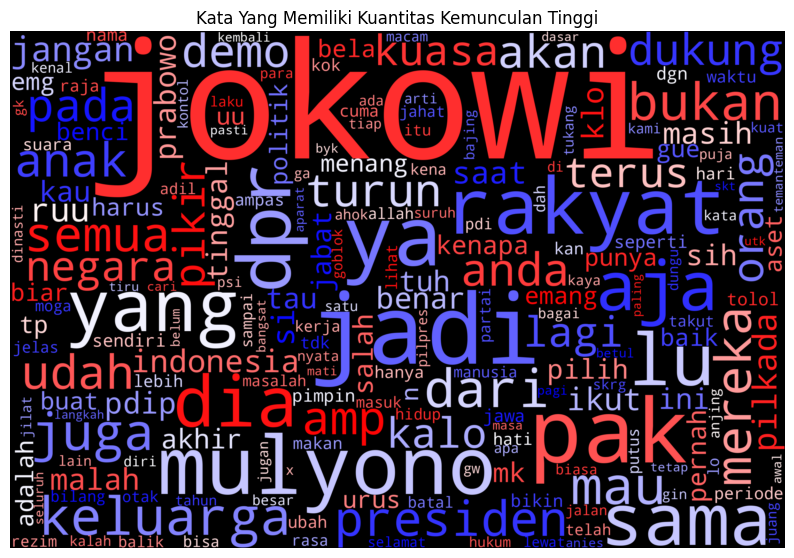

In [34]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

In [36]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
2,dari yang kagum sama jokowi apanyaaa orang uda...,"From being amazed at the joke, what people hav...",Positif
6,jokowi raja mencla mencle tak seia kata buat i...,Jonowi the king of cella mencle is not as good...,Positif
8,mereka bela rakyat mereka akan juga akan rasa ...,They defend the people. They will also win if ...,Positif
9,kami siap bela jokowi tpi dengan perintah lain,"We're ready to defend the joke, but with other...",Positif
11,turun adil mulyono aka,Down fair mulyono aka,Positif
...,...,...,...
263,lebih baik keluarga jokowi lenyap dari indon,It's better that the joke family vanishes from...,Positif
265,kasih bekas pun bahagia jangan lupa puja puji ...,Give me a happy ex. Don't forget the joke.,Positif
267,suram demokrasi rezim jokowi,grim democracy of the Joeowi regime,Negatif
271,tahun periode kaleeee kalo marah otak pake jug...,The year of the kaleeee period if the brain is...,Negatif


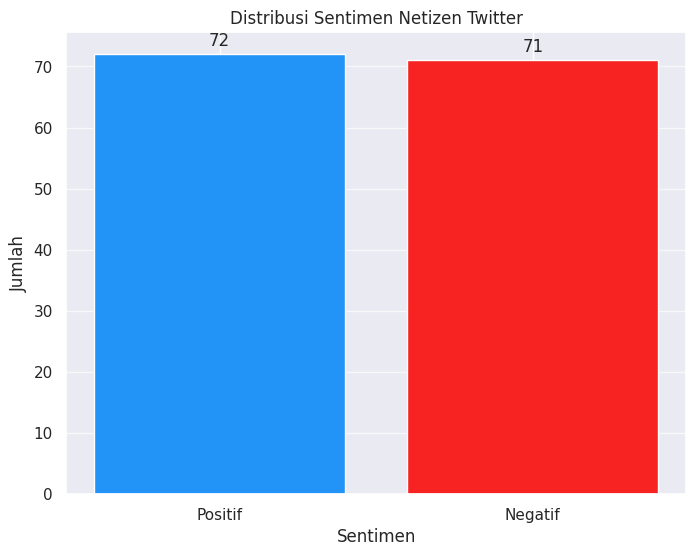

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Netizen Twitter")

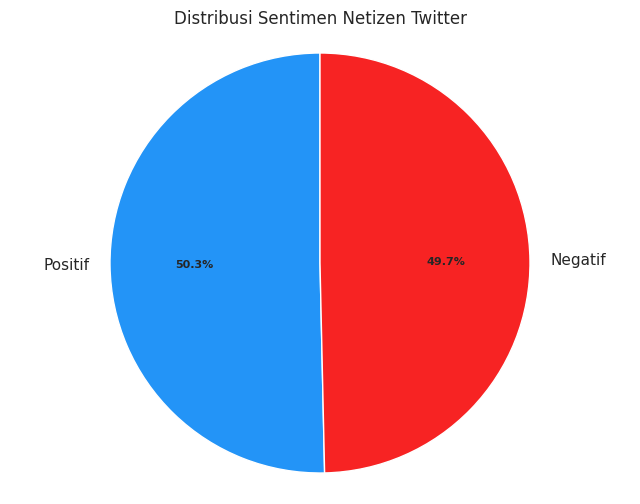

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Netizen Twitter")

In [41]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
2,dari yang kagum sama jokowi apanyaaa orang uda...,"From being amazed at the joke, what people hav...",0
6,jokowi raja mencla mencle tak seia kata buat i...,Jonowi the king of cella mencle is not as good...,0
8,mereka bela rakyat mereka akan juga akan rasa ...,They defend the people. They will also win if ...,0
9,kami siap bela jokowi tpi dengan perintah lain,"We're ready to defend the joke, but with other...",0
11,turun adil mulyono aka,Down fair mulyono aka,0
...,...,...,...
263,lebih baik keluarga jokowi lenyap dari indon,It's better that the joke family vanishes from...,0
265,kasih bekas pun bahagia jangan lupa puja puji ...,Give me a happy ex. Don't forget the joke.,0
267,suram demokrasi rezim jokowi,grim democracy of the Joeowi regime,1
271,tahun periode kaleeee kalo marah otak pake jug...,The year of the kaleeee period if the brain is...,1


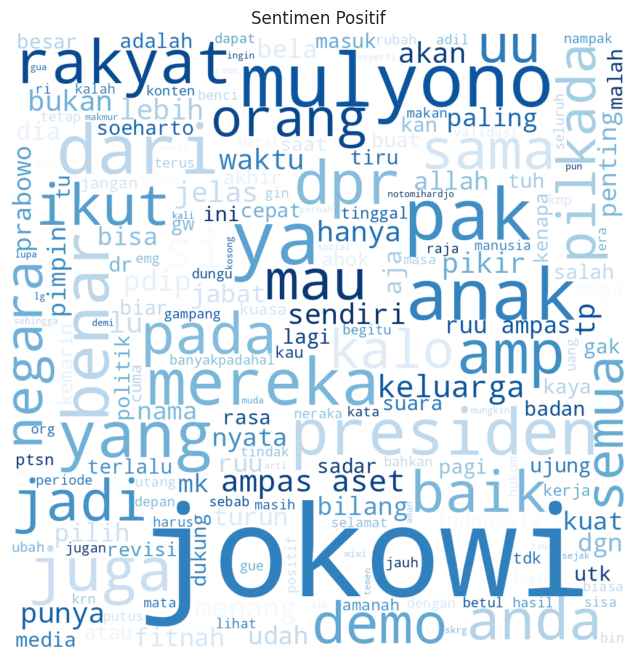

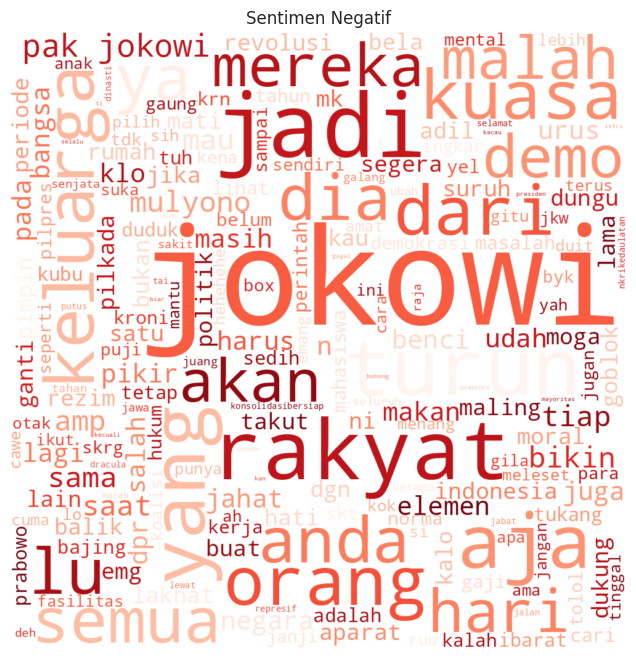

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [43]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,72
1,71


# **Transformation & Preparation Data**

In [44]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
print(len(X_test))
print(len(X_train))
print(len(y_test))
print(len(y_train))

43
100
43
100


In [49]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# **Data Mining**

In [50]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [53]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.627906976744186

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.59      0.76      0.67        21
     Negatif       0.69      0.50      0.58        22

    accuracy                           0.63        43
   macro avg       0.64      0.63      0.62        43
weighted avg       0.64      0.63      0.62        43



In [54]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[16  5]
 [11 11]]

True Positives (TP) =  16

True Negatives (TN) =  11

False Positives (FP) =  5

False Negatives (FN) =  11

Accuracy =  0.627906976744186


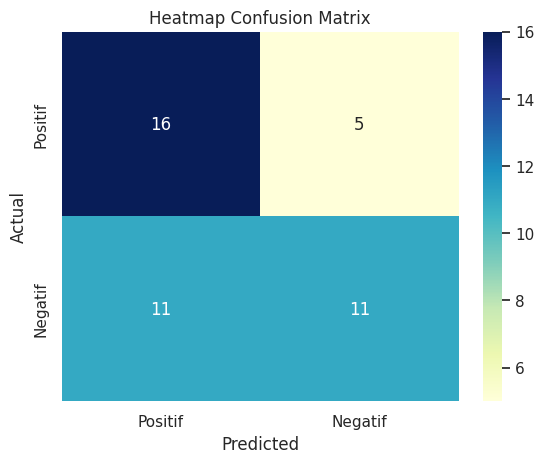

In [55]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [56]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [57]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6279


In [58]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3721


# **Testing**

In [62]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : polisi punya senjata dari rakyat senjata mereka menyakiti rakyat duh gegara membela anaknya jokowi
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 56.18%
Probabilitas: 56.1765806581022 %
